# 📝 Exercise M4.01

The aim of this exercise is two-fold:

* understand the parametrization of a linear model;
* quantify the fitting accuracy of a set of such models.

We will reuse part of the code of the course to:

* load data;
* create the function representing a linear model.

## Prerequisites

### Data loading

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [1]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_regression.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]

### Model definition

In [2]:
def linear_model_flipper_mass(
    flipper_length, weight_flipper_length, intercept_body_mass
):
    """Linear model of the form y = a * x + b"""
    body_mass = weight_flipper_length * flipper_length + intercept_body_mass
    return body_mass

## Main exercise

Given a vector of the flipper length, several weights and intercepts to
plot several linear model that could fit our data. Use the above
helper function to visualize both the model and data.

In [3]:
import numpy as np

flipper_length_range = np.linspace(data.min(), data.max(), num=300)

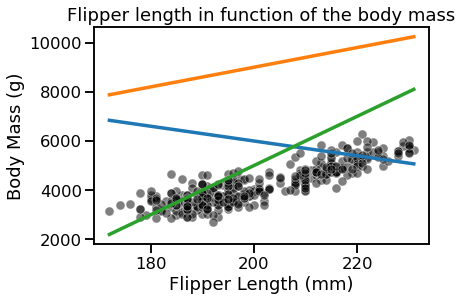

In [5]:
import seaborn as sns

weights = [-30, 40, 100]
intercepts = [12000, 1000, -15000]

ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)
ax.set_title("Flipper length in function of the body mass")
for weight, intercept in zip(weights, intercepts):
    predicted_body_mass = linear_model_flipper_mass(
        flipper_length_range, weight, intercept)
    ax.plot(flipper_length_range, predicted_body_mass)

In the previous question, you were asked to create several linear models.
The visualization allowed you to qualitatively assess if a model was better
than another.

Now, you should come up with a quantitative measure which will indicate the
goodness of fit of each linear model. This quantitative metric should result
in a single scalar and allow you to pick up the best model.

In [6]:
def goodness_fit_measure(true_values, predictions):
    errors = np.ravel(true_values) - np.ravel(predictions)
    return np.mean(np.abs(errors))

In [7]:
# Uncomment the code below.
for model_idx, (weight, intercept) in enumerate(zip(weights, intercepts)):
    target_predicted = linear_model_flipper_mass(data, weight, intercept)
    print(f"Model #{model_idx}:")
    print(f"{weight:.2f} (g / mm) * flipper length + {intercept:.2f} (g)")
    print(f"Error: {goodness_fit_measure(target, target_predicted):.3f}\n")

Model #0:
-30.00 (g / mm) * flipper length + 12000.00 (g)
Error: 1855.585

Model #1:
40.00 (g / mm) * flipper length + 1000.00 (g)
Error: 4834.854

Model #2:
100.00 (g / mm) * flipper length + -15000.00 (g)
Error: 1003.947

